In [1]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
# download the dataset
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_train.csv", "./data/X_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/y_train.csv", "./data/y_train.csv")
urllib.request.urlretrieve("https://nthu-datalab.github.io/ml/labs/05_Regularization/data/X_test.csv", "./data/X_test.csv")

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [3]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85751 entries, 0 to 85750
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PERIOD          85751 non-null  int64  
 1   GAME_CLOCK      85751 non-null  int64  
 2   SHOT_CLOCK      85751 non-null  float64
 3   DRIBBLES        85751 non-null  int64  
 4   TOUCH_TIME      85751 non-null  float64
 5   SHOT_DIST       85751 non-null  float64
 6   PTS_TYPE        85751 non-null  int64  
 7   CLOSE_DEF_DIST  85751 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 5.2 MB


In [4]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36751 entries, 0 to 36750
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PERIOD          36751 non-null  int64  
 1   GAME_CLOCK      36751 non-null  int64  
 2   SHOT_CLOCK      36751 non-null  float64
 3   DRIBBLES        36751 non-null  int64  
 4   TOUCH_TIME      36751 non-null  float64
 5   SHOT_DIST       36751 non-null  float64
 6   PTS_TYPE        36751 non-null  int64  
 7   CLOSE_DEF_DIST  36751 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 2.2 MB


## Model Training

### Part 1 Use all features to train any linear model in scikit-learn and try different hyperparameters + Error Curve

- Use all features

In [5]:
#Split train validation set
X_train = X_train.iloc[:,:].values
X_test = X_test.iloc[:,:].values
y_train = y_train.values

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(64313, 8)
(21438, 8)
(64313, 1)
(21438, 1)


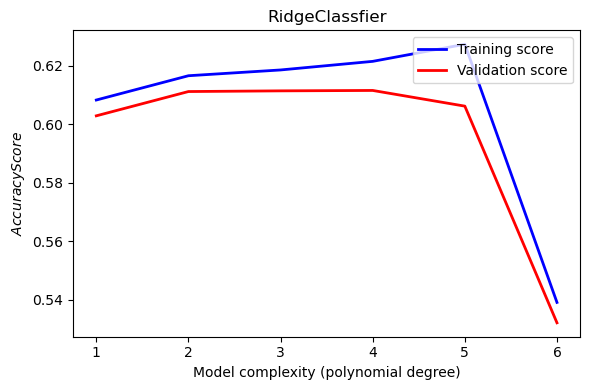

In [6]:
#try RidgeClassifier with different degree
score_train = []
score_test = []

max_degree = 7


for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    ridgeclf = RidgeClassifier()
    ridgeclf = ridgeclf.fit(X_train_poly, y_train)
    y_train_pred = ridgeclf.predict(X_train_poly)
    y_val_pred = ridgeclf.predict(X_val_poly)
    
    score_train.append(accuracy_score(y_train, y_train_pred))
    score_test.append(accuracy_score(y_val, y_val_pred))
    #print('Degree: ', d)
    
plt.figure(figsize=(6, 4))
plt.plot(range(1, max_degree), score_train, label = 'Training score', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), score_test, label = 'Validation score', color = 'red', linewidth = 2)
plt.title('RidgeClassfier')
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$Accuracy Score$')
plt.tight_layout()
plt.savefig('./output/fig-error-curve-ridge.png', dpi=300)
plt.show()

It seems that degree = 4 is better. For degree = 5, the validation score starts decreasing.

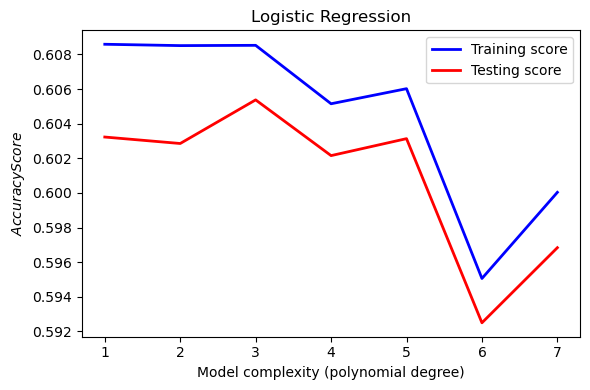

In [7]:
#try LogisticRegression with different degree
score_train = []
score_test = []

max_degree = 8


for d in range(1, max_degree):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    lg = LogisticRegression()
    lg = lg.fit(X_train_poly, y_train)
    y_train_pred = lg.predict(X_train_poly)
    y_val_pred = lg.predict(X_val_poly)
    
    score_train.append(accuracy_score(y_train, y_train_pred))
    score_test.append(accuracy_score(y_val, y_val_pred))
    #print('Degree: ', d)
    
plt.figure(figsize=(6,4))
plt.plot(range(1, max_degree), score_train, label = 'Training score', color = 'blue', linewidth = 2)
plt.plot(range(1, max_degree), score_test, label = 'Testing score', color = 'red', linewidth = 2)
plt.title('Logistic Regression')
plt.legend(loc='upper right')
plt.xlabel('Model complexity (polynomial degree)')
plt.ylabel('$Accuracy Score$')
plt.tight_layout()
plt.savefig('./output/fig-error-curve-logistic.png', dpi=300)
plt.show()

In [8]:
#try RidgeClassifier, degree = 4 with/ without standardscaler
sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train)
X_val_std = sc_x.fit_transform(X_val)

#without standardscaler
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)

ridgeclf = RidgeClassifier()
ridgeclf = ridgeclf.fit(X_train_poly, y_train)
y_train_pred = ridgeclf.predict(X_train_poly)
y_val_pred = ridgeclf.predict(X_val_poly)
print('Accuracy(without standardscaler) train: %.4f, validation: %.4f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)))

#with standardscaler
poly = PolynomialFeatures(degree=4)
X_train_std_poly = poly.fit_transform(X_train_std)
X_val_std_poly = poly.fit_transform(X_val_std)

ridgeclf = RidgeClassifier()
ridgeclf = ridgeclf.fit(X_train_std_poly, y_train)
y_train_std_pred = ridgeclf.predict(X_train_std_poly)
y_val_std_pred = ridgeclf.predict(X_val_std_poly)
print('Accuracy(with standardscaler) train: %.4f, validation: %.4f' % (accuracy_score(y_train, y_train_std_pred), accuracy_score(y_val, y_val_std_pred)))

Accuracy(without standardscaler) train: 0.6215, validation: 0.6115
Accuracy(with standardscaler) train: 0.6214, validation: 0.6119


In [9]:
#try LogisticRegression, degree = 3 with/ without standardscaler
sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train)
X_val_std = sc_x.fit_transform(X_val)

#without standardscaler
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.fit_transform(X_val)

lg = LogisticRegression()
lg = lg.fit(X_train_poly, y_train)
y_train_pred = lg.predict(X_train_poly)
y_val_pred = lg.predict(X_val_poly)
print('Accuracy(without standardscaler) train: %.4f, validation: %.4f' % (accuracy_score(y_train, y_train_pred), accuracy_score(y_val, y_val_pred)))

#with standardscaler
poly = PolynomialFeatures(degree=3)
X_train_std_poly = poly.fit_transform(X_train_std)
X_val_std_poly = poly.fit_transform(X_val_std)

lg = LogisticRegression()
lg = lg.fit(X_train_std_poly, y_train)
y_train_std_pred = lg.predict(X_train_std_poly)
y_val_std_pred = lg.predict(X_val_std_poly)
print('Accuracy(with standardscaler) train: %.4f, validation: %.4f' % (accuracy_score(y_train, y_train_std_pred), accuracy_score(y_val, y_val_std_pred)))


Accuracy(without standardscaler) train: 0.6085, validation: 0.6054
Accuracy(with standardscaler) train: 0.6188, validation: 0.6120


- **Selecting setting: RidgeClassifier with degree = 4 and standardscaler first**

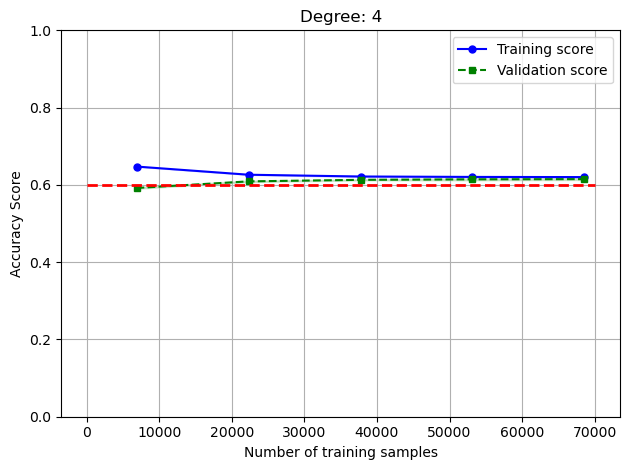

In [10]:
# Learning Curve for RidgeClassifier with degree = 4 and standardscaler
X_train_learn = pd.read_csv('./data/X_train.csv')
y_train_learn = pd.read_csv('./data/y_train.csv')

X_train_learn = X_train_learn.iloc[:,:].values
y_train_learn = y_train_learn.values

sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train_learn)

d = 4

poly = PolynomialFeatures(degree=d)
X_train_std_poly = poly.fit_transform(X_train_std)

ridgeclf = RidgeClassifier()

train_sizes, train_scores, val_scores = learning_curve(estimator=ridgeclf, X=X_train_std_poly, y=y_train_learn, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',
        markersize=5,label='Training score')
plt.fill_between(train_sizes,train_mean+train_std,
        train_mean-train_std,alpha=0.15, color='blue')
    
plt.plot(train_sizes, val_mean, color='green', linestyle='--',
        marker='s', markersize=5, label='Validation score')
plt.fill_between(train_sizes, val_mean+val_std,
        val_mean-val_std, alpha=0.15, color='green')
    
plt.hlines(y = 0.6, xmin=0, xmax=70000, color='red', linewidth=2, linestyle='--')
  
plt.title('Degree: %d' % d)
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy Score')
plt.legend(loc='upper right')
plt.ylim([0, 1])
plt.tight_layout()
plt.savefig('./output/fig-learning-curve1-%d.png' % d, dpi=300)
plt.show()

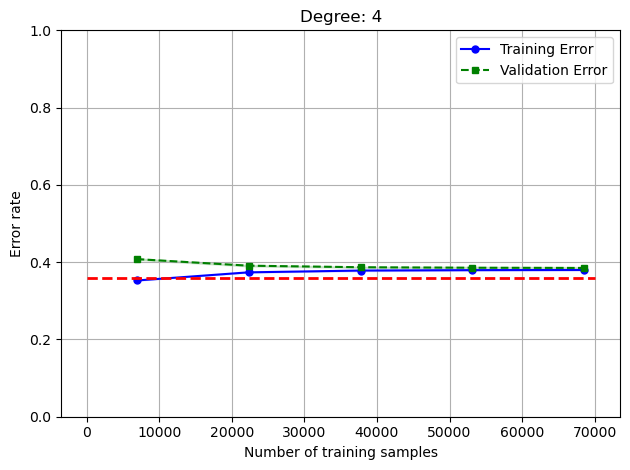

In [11]:
# Error Curve for RidgeClassifier with degree = 4 and standardscaler

X_train = pd.read_csv('./data/X_train.csv')
y_train= pd.read_csv('./data/y_train.csv')

X_train_error = X_train.iloc[:,:].values
y_train_error = y_train.values

sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train_error)

d = 4

poly = PolynomialFeatures(degree=d)
X_train_std_poly = poly.fit_transform(X_train_std)

ridgeclf = RidgeClassifier()

train_sizes, train_scores, val_scores = learning_curve(estimator=ridgeclf, X=X_train_std_poly, y=y_train_error, scoring = 'accuracy')

train_mean = np.mean(1-train_scores, axis=1)
train_std = np.std(1-train_scores, axis=1)
val_mean = np.mean(1-val_scores, axis=1)
val_std = np.std(1-val_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',
        markersize=5,label='Training Error')
plt.fill_between(train_sizes,train_mean+train_std,
        train_mean-train_std,alpha=0.15, color='blue')
    
plt.plot(train_sizes, val_mean, color='green', linestyle='--',
        marker='s', markersize=5, label='Validation Error')
plt.fill_between(train_sizes, val_mean+val_std,
        val_mean-val_std, alpha=0.15, color='green')
    
plt.hlines(y = 0.36, xmin=0, xmax=70000, color='red', linewidth=2, linestyle='--')
  
plt.title('Degree: %d' % d)
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Error rate')
plt.legend(loc='upper right')
plt.ylim([0, 1])
plt.tight_layout()
plt.savefig('./output/fig-error-curve1-%d.png' % d, dpi=300)
plt.show()

-> **The model is not overfit**

### Part 2 Use any method to choose the best 3 features

In [12]:
#re-load dataset
X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

- choose features depends on its coefficient

In [13]:
#choose three best features based on their absolute value of coefficient in the model
sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train)

ridgeclf = RidgeClassifier()
ridgeclf.fit(X_train_std, y_train)
for i in range(X_train.shape[1]):
    print('Column: %s, coefficient: %.4f' %(X_train.columns[i], ridgeclf.coef_[0][i]))

Column: PERIOD, coefficient: -0.0030
Column: GAME_CLOCK, coefficient: -0.0054
Column: SHOT_CLOCK, coefficient: 0.0386
Column: DRIBBLES, coefficient: 0.0442
Column: TOUCH_TIME, coefficient: -0.0802
Column: SHOT_DIST, coefficient: -0.2642
Column: PTS_TYPE, coefficient: 0.0234
Column: CLOSE_DEF_DIST, coefficient: 0.1222


-> **choose TOUCH_TIME, SHOT_DIST, CLOSE_DEF_DIST for predicting models, since these three features have larger absolute values of coefficient**

- Train the model selected in 2. with the only 3 features selected in 3., and present the training error

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)
X_train_selected = X_train[['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']]
X_val_selected = X_val[['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']]
X_train_selected = X_train_selected.iloc[:,:].values
X_val_selectd = X_val_selected.iloc[:,:].values
y_train = y_train.values

sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train_selected)
X_val_std = sc_x.fit_transform(X_val_selected)

poly = PolynomialFeatures(degree=4)
X_train_std_poly = poly.fit_transform(X_train_std)
X_val_std_poly = poly.fit_transform(X_val_std)

ridgeclf = RidgeClassifier()
ridgeclf = ridgeclf.fit(X_train_std_poly, y_train)
y_train_std_pred = ridgeclf.predict(X_train_std_poly)
y_val_std_pred = ridgeclf.predict(X_val_std_poly)
print('Accuracy train: %.4f, validation: %.4f' % (accuracy_score(y_train, y_train_std_pred), accuracy_score(y_val, y_val_std_pred)))
print('Error train: %.4f, validation: %.4f' % (1-accuracy_score(y_train, y_train_std_pred), 1-accuracy_score(y_val, y_val_std_pred)))
print('Confusion matrix about training set: \n', confusion_matrix(y_train, y_train_std_pred))

Accuracy train: 0.6162, validation: 0.6123
Error train: 0.3838, validation: 0.3877
Confusion matrix about training set: 
 [[28861  6272]
 [18412 10768]]


Compared with the model which uses all the features to train the model, the model which only uses the best three features has a higher validation score.

- Export the predictions of the model trained in 4. for X_test

In [17]:
X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [18]:
X_train_selected = X_train[['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']]
X_test_selected = X_test[['TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST']]
X_train_selected = X_train_selected.iloc[:,:].values
X_test_selectd = X_test_selected.iloc[:,:].values
y_train = y_train.values

sc_x = StandardScaler()
X_train_std = sc_x.fit_transform(X_train_selected)
X_test_std = sc_x.fit_transform(X_test_selected)

poly = PolynomialFeatures(degree=4)
X_train_std_poly = poly.fit_transform(X_train_std)
X_test_std_poly = poly.fit_transform(X_test_std)

ridgeclf = RidgeClassifier()
ridgeclf = ridgeclf.fit(X_train_std_poly, y_train)
y_test_std_pred = ridgeclf.predict(X_test_std_poly)

In [19]:
submission = pd.DataFrame({'FGM': y_test_std_pred})
submission.to_csv('Lab05_112065501_y_pred.csv', index=False)